In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(25000,)

In [5]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [6]:
X_test.shape

(25000,)

In [7]:
len(X_test)

25000

In [8]:
Y_test.shape

(25000,)

In [9]:
def OneHotEncoding_fn(IMDBData, dimension=10000):
    #25k x 10k matrix of zeros
    OneHotEncoded_Data = np.zeros((len(IMDBData), dimension)) 
    for i, sequence in enumerate(IMDBData):
        #Selectively make indices as 1 based on availability of word in the review.
        OneHotEncoded_Data[i, sequence] = 1.
    return OneHotEncoded_Data
print(X_train[0])

x_train = OneHotEncoding_fn(X_train)
x_test = OneHotEncoding_fn(X_test)
y_train = np.asarray(Y_train).astype('float32')
y_test = np.asarray(Y_test).astype('float32')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
x_train.shape

(25000, 10000)

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
from keras import optimizers
from keras import losses
from keras import metrics

X_validation = x_train[:5000]
X_train_without_val = x_train[5000:]
y_validation = y_train[:5000]
y_train_without_val = y_train[5000:]


model.compile(optimizer=optimizers.RMSprop(lr=0.001, rho=0.9), loss= 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_without_val, y_train_without_val, epochs=25, batch_size=512, validation_data=(X_validation,y_validation))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/25





20000/20000 [==============================] - 11s 533us/step - loss: 0.4678 - acc: 0.7955 - val_loss: 0.3222 - val_acc: 0.8818
Epoch 2/25
20000/20000 [==============================] - 1s 64us/step - loss: 0.2593 - acc: 0.9071 - val_loss: 0.2985 - val_acc: 0.8830
Epoch 3/25
20000/20000 [==============================] - 1s 65us/step - loss: 0.1936 - acc: 0.9311 - val_loss: 0.2811 - val_acc: 0.8886
Epoch 4/25
20000/20000 [==============================] - 1s 64us/step - loss: 0.1597 - acc: 0.9435 - val_loss: 0.2854 - val_acc: 0.8910
Epoch 5/25
20000/20000 [==============================] - 1s 65us/step - loss: 0.1310 - acc: 0.9539 - val_loss: 0.2976 - val_acc: 0.8878
Epoch 6/25
20000/20000 [==============================] - 1s 65us/step - loss: 0.1144 - acc: 0.9598 - val_loss: 0.3138 - val_acc: 0.8878
Epoch 7/25
20000/20000 

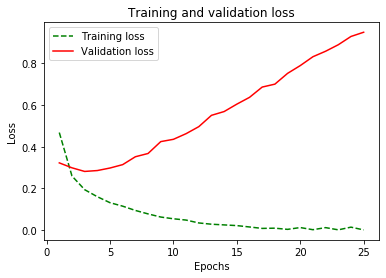

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

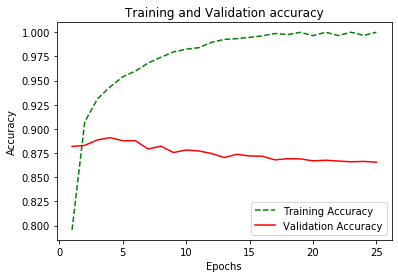

In [14]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'g--', label = 'Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [15]:
model.evaluate(x_test, Y_test)

25000/25000 [==============================] - 2s 85us/step


[1.0995829836988449, 0.84416]

In [16]:
#model with regularization and Dropout
from keras import regularizers

model = models.Sequential()
model.add(Dense(32, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.01), activation = 'relu', input_shape=(10000,)))
model.add(Dropout(0.3))
model.add(Dense(32, kernel_regularizer = regularizers.l1_l2(l1 = 0.001, l2 = 0.01), activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
model.compile(optimizer='Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_without_val, y_train_without_val, epochs=25, batch_size=512, validation_data=(X_validation,y_validation))

Train on 20000 samples, validate on 5000 samples
Epoch 1/25
20000/20000 [==============================] - 2s 90us/step - loss: 2.3808 - acc: 0.6034 - val_loss: 1.1414 - val_acc: 0.8034
Epoch 2/25
20000/20000 [==============================] - 1s 66us/step - loss: 0.9963 - acc: 0.7738 - val_loss: 0.8275 - val_acc: 0.8416
Epoch 3/25
20000/20000 [==============================] - 1s 64us/step - loss: 0.8377 - acc: 0.8350 - val_loss: 0.7492 - val_acc: 0.8652
Epoch 4/25
20000/20000 [==============================] - 1s 65us/step - loss: 0.7686 - acc: 0.8594 - val_loss: 0.7163 - val_acc: 0.8652
Epoch 5/25
20000/20000 [==============================] - 1s 65us/step - loss: 0.7416 - acc: 0.8625 - val_loss: 0.6784 - val_acc: 0.8694
Epoch 6/25
20000/20000 [==============================] - 1s 64us/step - loss: 0.6731 - acc: 0.8705 - val_loss: 0.6530 - val_acc: 0.8622
Epoch 7/25
20000/20000 [==============================] - 1s 63us/step - loss: 0.6560 - acc: 0.8683 - val_loss: 0.6183 - val_acc:

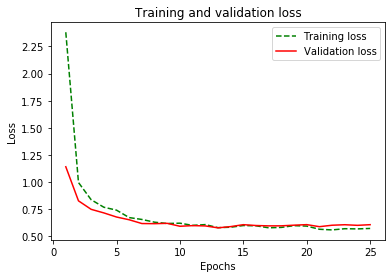

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 25 + 1)

plt.plot(epochs, loss_values, 'g--', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

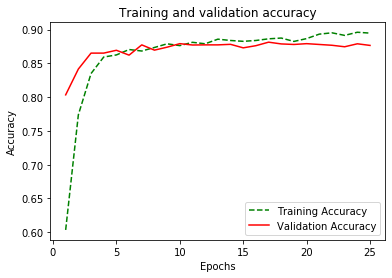

In [19]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'g--', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 98us/step


[0.6129204214096069, 0.87164]